In [800]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer  
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import GaussianNB
from scipy.stats import ttest_ind
from sklearn.metrics import confusion_matrix
from scipy.stats import f_oneway
import statsmodels.api as sm
from sklearn.metrics import roc_curve, auc


In [835]:
!ls /Users/ksenija/Desktop/ViS/OzoneLevelDetection

Projekat-Copy.ipynb             onehr.data.csv
Projekat.ipynb                  onehr.names.txt
eighthr.data.csv                prilagodjena_toplinska_mapa.png
eighthr.names.txt


Prikazan je sadržaj direktorijuma.

In [802]:
df = pd.read_csv('/Users/ksenija/Desktop/ViS/OzoneLevelDetection/eighthr.data.csv', header= None)
df

0    1    2    3    4    5    6    7    8    9   ...    64  \
0       1/1/1998  0.8  1.8  2.4  2.1    2  2.1  1.5  1.7  1.9  ...  0.15   
1       1/2/1998  2.8  3.2  3.3  2.7  3.3  3.2  2.9  2.8  3.1  ...  0.48   
2       1/3/1998  2.9  2.8  2.6  2.1  2.2  2.5  2.5  2.7  2.2  ...   0.6   
3       1/4/1998  4.7  3.8  3.7  3.8  2.9  3.1  2.8  2.5  2.4  ...  0.49   
4       1/5/1998  2.6  2.1  1.6  1.4  0.9  1.5  1.2  1.4  1.3  ...     ?   
...          ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   
2529  12/27/2004  0.3  0.4  0.5  0.5  0.2  0.3  0.4  0.4  1.3  ...  0.07   
2530  12/28/2004    1  1.4  1.1  1.7  1.5  1.7  1.8  1.5  2.1  ...  0.04   
2531  12/29/2004  0.8  0.8  1.2  0.9  0.4  0.6  0.8  1.1  1.5  ...  0.06   
2532  12/30/2004  1.3  0.9  1.5  1.2  1.6  1.8  1.1    1  1.9  ...  0.25   
2533  12/31/2004  1.5  1.3  1.8  1.4  1.2  1.7  1.6  1.4  1.6  ...  0.54   

         65     66    67     68     69     70   71    72   73  
0     10.67  -1.56  5795  -12.1   17.9  10330  -55     0  0.0  
1      8.39   3.84  5805  14.05     29  10275  -55     0  0.0  
2      6.94    9.8  5790   17.9   41.3  10235  -40     0  0.0  
3      8.73  10.54  5775  31.15   51.7  10195  -40  2.08  0.0  
4         ?      ?     ?      ?      ?      ?    ?  0.58  0.0  
...     ...    ...   ...    ...    ...    ...  ...   ...  ...  
2529   7.93  -4.41  5800  -25.6   21.8  10295   65     0  0.0  
2530   5.95  -1.14  5845  -19.4   19.1  10310   15     0  0.0  
2531    7.8  -0.64  5845   -9.6   35.2  10275  -35     0  0.0  
2532   7.72  -0.89  5845  -19.6   34.2  10245  -30  0.05  0.0  
2533  13.07   9.15  5820   1.95  39.35  10220  -25     0  0.0  

[2534 rows x 74 columns]

U tabeli ne postoje imena kolona,tako da ih moramo dodati.

In [803]:
df.columns = ["Date","WSR0","WSR1","WSR2","WSR3","WSR4","WSR5","WSR6","WSR7","WSR8","WSR9","WSR10","WSR11","WSR12","WSR13","WSR14","WSR15","WSR16","WSR17","WSR18","WSR19","WSR20","WSR21","WSR22","WSR23","WSR_PK","WSR_AV","T0","T1","T2","T3","T4","T5","T6","T7","T8","T9","T10","T11","T12","T13","T14","T15","T16","T17","T18","T19","T20","T21","T22","T23","T_PK","T_AV","T85","RH85","U85","V85","HT85","T70","RH70","U70","V70","HT70","T50","RH50","U50","V50","HT50","KI","TT","SLP","SLP_","Precp","Target"]
df

Date WSR0 WSR1 WSR2 WSR3 WSR4 WSR5 WSR6 WSR7 WSR8  ...  RH50  \
0       1/1/1998  0.8  1.8  2.4  2.1    2  2.1  1.5  1.7  1.9  ...  0.15   
1       1/2/1998  2.8  3.2  3.3  2.7  3.3  3.2  2.9  2.8  3.1  ...  0.48   
2       1/3/1998  2.9  2.8  2.6  2.1  2.2  2.5  2.5  2.7  2.2  ...   0.6   
3       1/4/1998  4.7  3.8  3.7  3.8  2.9  3.1  2.8  2.5  2.4  ...  0.49   
4       1/5/1998  2.6  2.1  1.6  1.4  0.9  1.5  1.2  1.4  1.3  ...     ?   
...          ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   
2529  12/27/2004  0.3  0.4  0.5  0.5  0.2  0.3  0.4  0.4  1.3  ...  0.07   
2530  12/28/2004    1  1.4  1.1  1.7  1.5  1.7  1.8  1.5  2.1  ...  0.04   
2531  12/29/2004  0.8  0.8  1.2  0.9  0.4  0.6  0.8  1.1  1.5  ...  0.06   
2532  12/30/2004  1.3  0.9  1.5  1.2  1.6  1.8  1.1    1  1.9  ...  0.25   
2533  12/31/2004  1.5  1.3  1.8  1.4  1.2  1.7  1.6  1.4  1.6  ...  0.54   

        U50    V50  HT50     KI     TT    SLP SLP_ Precp Target  
0     10.67  -1.56  5795  -12.1   17.9  10330  -55     0    0.0  
1      8.39   3.84  5805  14.05     29  10275  -55     0    0.0  
2      6.94    9.8  5790   17.9   41.3  10235  -40     0    0.0  
3      8.73  10.54  5775  31.15   51.7  10195  -40  2.08    0.0  
4         ?      ?     ?      ?      ?      ?    ?  0.58    0.0  
...     ...    ...   ...    ...    ...    ...  ...   ...    ...  
2529   7.93  -4.41  5800  -25.6   21.8  10295   65     0    0.0  
2530   5.95  -1.14  5845  -19.4   19.1  10310   15     0    0.0  
2531    7.8  -0.64  5845   -9.6   35.2  10275  -35     0    0.0  
2532   7.72  -0.89  5845  -19.6   34.2  10245  -30  0.05    0.0  
2533  13.07   9.15  5820   1.95  39.35  10220  -25     0    0.0  

[2534 rows x 74 columns]

Dodata imena preuzeta su iz fajla 'eighthr.names.txt'

In [804]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2534 entries, 0 to 2533
Data columns (total 74 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2534 non-null   object 
 1   WSR0    2534 non-null   object 
 2   WSR1    2534 non-null   object 
 3   WSR2    2534 non-null   object 
 4   WSR3    2534 non-null   object 
 5   WSR4    2534 non-null   object 
 6   WSR5    2534 non-null   object 
 7   WSR6    2534 non-null   object 
 8   WSR7    2534 non-null   object 
 9   WSR8    2534 non-null   object 
 10  WSR9    2534 non-null   object 
 11  WSR10   2534 non-null   object 
 12  WSR11   2534 non-null   object 
 13  WSR12   2534 non-null   object 
 14  WSR13   2534 non-null   object 
 15  WSR14   2534 non-null   object 
 16  WSR15   2534 non-null   object 
 17  WSR16   2534 non-null   object 
 18  WSR17   2534 non-null   object 
 19  WSR18   2534 non-null   object 
 20  WSR19   2534 non-null   object 
 21  WSR20   2534 non-null   object 
 22  

Izlistali smo osnovne informacije o strukturi podataka.

In [805]:
df.groupby('Target').count().reset_index()

Target  Date  WSR0  WSR1  WSR2  WSR3  WSR4  WSR5  WSR6  WSR7  ...   T50  \
0     0.0  2374  2374  2374  2374  2374  2374  2374  2374  2374  ...  2374   
1     1.0   160   160   160   160   160   160   160   160   160  ...   160   

   RH50   U50   V50  HT50    KI    TT   SLP  SLP_  Precp  
0  2374  2374  2374  2374  2374  2374  2374  2374   2374  
1   160   160   160   160   160   160   160   160    160  

[2 rows x 74 columns]

Grupisane vrednosti ciljane promenljive Target sadrže dve vrednosti, 0 (normalan dan) i 1 (dan ozona).

In [806]:
df.Target = pd.Categorical(df.Target,[0.0,1.0])

Konvertovali smo numeričke vrednosti u kategoričke.

In [807]:
result = df.groupby('Target').count().reset_index()
print(result)

  Target  Date  WSR0  WSR1  WSR2  WSR3  WSR4  WSR5  WSR6  WSR7  ...   T50  \
0    0.0  2374  2374  2374  2374  2374  2374  2374  2374  2374  ...  2374   
1    1.0   160   160   160   160   160   160   160   160   160  ...   160   

   RH50   U50   V50  HT50    KI    TT   SLP  SLP_  Precp  
0  2374  2374  2374  2374  2374  2374  2374  2374   2374  
1   160   160   160   160   160   160   160   160    160  

[2 rows x 74 columns]


Ispisali smo rezultat.

In [808]:
df

Date WSR0 WSR1 WSR2 WSR3 WSR4 WSR5 WSR6 WSR7 WSR8  ...  RH50  \
0       1/1/1998  0.8  1.8  2.4  2.1    2  2.1  1.5  1.7  1.9  ...  0.15   
1       1/2/1998  2.8  3.2  3.3  2.7  3.3  3.2  2.9  2.8  3.1  ...  0.48   
2       1/3/1998  2.9  2.8  2.6  2.1  2.2  2.5  2.5  2.7  2.2  ...   0.6   
3       1/4/1998  4.7  3.8  3.7  3.8  2.9  3.1  2.8  2.5  2.4  ...  0.49   
4       1/5/1998  2.6  2.1  1.6  1.4  0.9  1.5  1.2  1.4  1.3  ...     ?   
...          ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   
2529  12/27/2004  0.3  0.4  0.5  0.5  0.2  0.3  0.4  0.4  1.3  ...  0.07   
2530  12/28/2004    1  1.4  1.1  1.7  1.5  1.7  1.8  1.5  2.1  ...  0.04   
2531  12/29/2004  0.8  0.8  1.2  0.9  0.4  0.6  0.8  1.1  1.5  ...  0.06   
2532  12/30/2004  1.3  0.9  1.5  1.2  1.6  1.8  1.1    1  1.9  ...  0.25   
2533  12/31/2004  1.5  1.3  1.8  1.4  1.2  1.7  1.6  1.4  1.6  ...  0.54   

        U50    V50  HT50     KI     TT    SLP SLP_ Precp Target  
0     10.67  -1.56  5795  -12.1   17.9  10330  -55     0    0.0  
1      8.39   3.84  5805  14.05     29  10275  -55     0    0.0  
2      6.94    9.8  5790   17.9   41.3  10235  -40     0    0.0  
3      8.73  10.54  5775  31.15   51.7  10195  -40  2.08    0.0  
4         ?      ?     ?      ?      ?      ?    ?  0.58    0.0  
...     ...    ...   ...    ...    ...    ...  ...   ...    ...  
2529   7.93  -4.41  5800  -25.6   21.8  10295   65     0    0.0  
2530   5.95  -1.14  5845  -19.4   19.1  10310   15     0    0.0  
2531    7.8  -0.64  5845   -9.6   35.2  10275  -35     0    0.0  
2532   7.72  -0.89  5845  -19.6   34.2  10245  -30  0.05    0.0  
2533  13.07   9.15  5820   1.95  39.35  10220  -25     0    0.0  

[2534 rows x 74 columns]

In [810]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2534 entries, 0 to 2533
Data columns (total 74 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   Date    2534 non-null   object  
 1   WSR0    2534 non-null   object  
 2   WSR1    2534 non-null   object  
 3   WSR2    2534 non-null   object  
 4   WSR3    2534 non-null   object  
 5   WSR4    2534 non-null   object  
 6   WSR5    2534 non-null   object  
 7   WSR6    2534 non-null   object  
 8   WSR7    2534 non-null   object  
 9   WSR8    2534 non-null   object  
 10  WSR9    2534 non-null   object  
 11  WSR10   2534 non-null   object  
 12  WSR11   2534 non-null   object  
 13  WSR12   2534 non-null   object  
 14  WSR13   2534 non-null   object  
 15  WSR14   2534 non-null   object  
 16  WSR15   2534 non-null   object  
 17  WSR16   2534 non-null   object  
 18  WSR17   2534 non-null   object  
 19  WSR18   2534 non-null   object  
 20  WSR19   2534 non-null   object  
 21  WSR20   2534 n

Primećujemo da u 'Dtype' redu ispisuje 'object' umesto numeričkog formata.

In [811]:
df.replace('?', np.nan, inplace = True)
df

Date WSR0 WSR1 WSR2 WSR3 WSR4 WSR5 WSR6 WSR7 WSR8  ...  RH50  \
0       1/1/1998  0.8  1.8  2.4  2.1    2  2.1  1.5  1.7  1.9  ...  0.15   
1       1/2/1998  2.8  3.2  3.3  2.7  3.3  3.2  2.9  2.8  3.1  ...  0.48   
2       1/3/1998  2.9  2.8  2.6  2.1  2.2  2.5  2.5  2.7  2.2  ...   0.6   
3       1/4/1998  4.7  3.8  3.7  3.8  2.9  3.1  2.8  2.5  2.4  ...  0.49   
4       1/5/1998  2.6  2.1  1.6  1.4  0.9  1.5  1.2  1.4  1.3  ...   NaN   
...          ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   
2529  12/27/2004  0.3  0.4  0.5  0.5  0.2  0.3  0.4  0.4  1.3  ...  0.07   
2530  12/28/2004    1  1.4  1.1  1.7  1.5  1.7  1.8  1.5  2.1  ...  0.04   
2531  12/29/2004  0.8  0.8  1.2  0.9  0.4  0.6  0.8  1.1  1.5  ...  0.06   
2532  12/30/2004  1.3  0.9  1.5  1.2  1.6  1.8  1.1    1  1.9  ...  0.25   
2533  12/31/2004  1.5  1.3  1.8  1.4  1.2  1.7  1.6  1.4  1.6  ...  0.54   

        U50    V50  HT50     KI     TT    SLP SLP_ Precp Target  
0     10.67  -1.56  5795  -12.1   17.9  10330  -55     0    0.0  
1      8.39   3.84  5805  14.05     29  10275  -55     0    0.0  
2      6.94    9.8  5790   17.9   41.3  10235  -40     0    0.0  
3      8.73  10.54  5775  31.15   51.7  10195  -40  2.08    0.0  
4       NaN    NaN   NaN    NaN    NaN    NaN  NaN  0.58    0.0  
...     ...    ...   ...    ...    ...    ...  ...   ...    ...  
2529   7.93  -4.41  5800  -25.6   21.8  10295   65     0    0.0  
2530   5.95  -1.14  5845  -19.4   19.1  10310   15     0    0.0  
2531    7.8  -0.64  5845   -9.6   35.2  10275  -35     0    0.0  
2532   7.72  -0.89  5845  -19.6   34.2  10245  -30  0.05    0.0  
2533  13.07   9.15  5820   1.95  39.35  10220  -25     0    0.0  

[2534 rows x 74 columns]


Kako bi uopšte mogli da dođemo do ispravnog rezultata, za početak, znak '?' zamenili smo sa 'NaN'.

In [812]:
# Sve kolone osim "Date" konvertujemo u numerički format
for column in df.columns[1:-1]:
    df[column] = pd.to_numeric(df[column], errors='coerce')

# Postavljamo tip podataka "Date" kolone da bude 'object'
df['Date'] = df['Date'].astype(object)

# Konvertujemo "Target" kolonu iz 'category'u 'int'
df['Target'] = df['Target'].astype(int)


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2534 entries, 0 to 2533
Data columns (total 74 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2534 non-null   object 
 1   WSR0    2235 non-null   float64
 2   WSR1    2242 non-null   float64
 3   WSR2    2240 non-null   float64
 4   WSR3    2242 non-null   float64
 5   WSR4    2241 non-null   float64
 6   WSR5    2242 non-null   float64
 7   WSR6    2243 non-null   float64
 8   WSR7    2245 non-null   float64
 9   WSR8    2244 non-null   float64
 10  WSR9    2247 non-null   float64
 11  WSR10   2246 non-null   float64
 12  WSR11   2242 non-null   float64
 13  WSR12   2247 non-null   float64
 14  WSR13   2246 non-null   float64
 15  WSR14   2246 non-null   float64
 16  WSR15   2248 non-null   float64
 17  WSR16   2250 non-null   float64
 18  WSR17   2251 non-null   float64
 19  WSR18   2248 non-null   float64
 20  WSR19   2242 non-null   float64
 21  WSR20   2240 non-null   float64
 22  

In [813]:
ozone = (df['Target'] == 1)
df[ozone]

Date  WSR0  WSR1  WSR2  WSR3  WSR4  WSR5  WSR6  WSR7  WSR8  ...  \
94     4/5/1998   0.4   0.5   2.1   2.2   2.5   2.4   2.1   2.9   3.6  ...   
100   4/11/1998   0.0   0.6   0.4   0.3   0.1   0.3   0.2   1.4   2.6  ...   
109   4/20/1998   1.8   0.3   0.1   0.1   0.1   0.2   0.2   0.7   0.9  ...   
112   4/23/1998   0.5   0.1   0.1   0.1   0.1   0.2   0.3   0.8   1.2  ...   
114   4/25/1998   3.1   2.4   2.4   3.0   3.4   3.4   3.9   4.5   5.5  ...   
...         ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
2413   9/2/2004   0.4   0.8   0.8   0.8   0.8   1.2   1.2   1.5   1.9  ...   
2428  9/17/2004   0.3   0.4   0.5   0.4   0.1   0.5   0.9   1.3   2.0  ...   
2429  9/18/2004   0.2   0.0   0.2   0.2   0.4   0.3   0.1   0.4   0.6  ...   
2440  9/29/2004   0.1   0.3   1.0   0.5   0.4   0.4   0.5   1.0   1.1  ...   
2441  9/30/2004   0.4   0.9   1.1   1.0   1.1   1.0   1.3   1.7   2.2  ...   

      RH50    U50    V50    HT50     KI     TT      SLP  SLP_  Precp  Target  
94    0.10  20.91  -3.90  5755.0 -15.90  19.40  10140.0  20.0   0.00       1  
100   0.15  17.27 -12.27  5795.0 -12.60  24.20  10220.0  45.0   0.00       1  
109   0.31  20.36   2.61  5740.0  -3.50  30.60  10180.0  35.0   0.00       1  
112   0.14  16.78 -17.99  5680.0  -2.40  37.60  10195.0 -10.0   0.00       1  
114   0.13   9.22  -5.96  5790.0   7.10  35.40  10165.0 -25.0   0.00       1  
...    ...    ...    ...     ...    ...    ...      ...   ...    ...     ...  
2413  0.44   4.42   2.42  5880.0   8.90  42.40  10155.0 -25.0   1.19       1  
2428  0.13   3.22  -3.49  5885.0  36.45  48.00  10100.0  40.0   0.00       1  
2429  0.09   0.87  -2.91  5910.0  33.85  48.05  10130.0  30.0   0.00       1  
2440  0.07  14.12   6.61  5835.0  20.20  36.40  10150.0  25.0   0.00       1  
2441  0.04    NaN    NaN  5830.0  11.70  28.40  10140.0 -10.0   0.00       1  

[160 rows x 74 columns]

Uveli smo promenljivu 'ozone' kojoj smo dodelili vrednosti iz kolone 'Target' koje su jednake 1. 

# Linearna regresija

Mean Squared Error: 7.435761215469383e-27
R-squared: 1.0


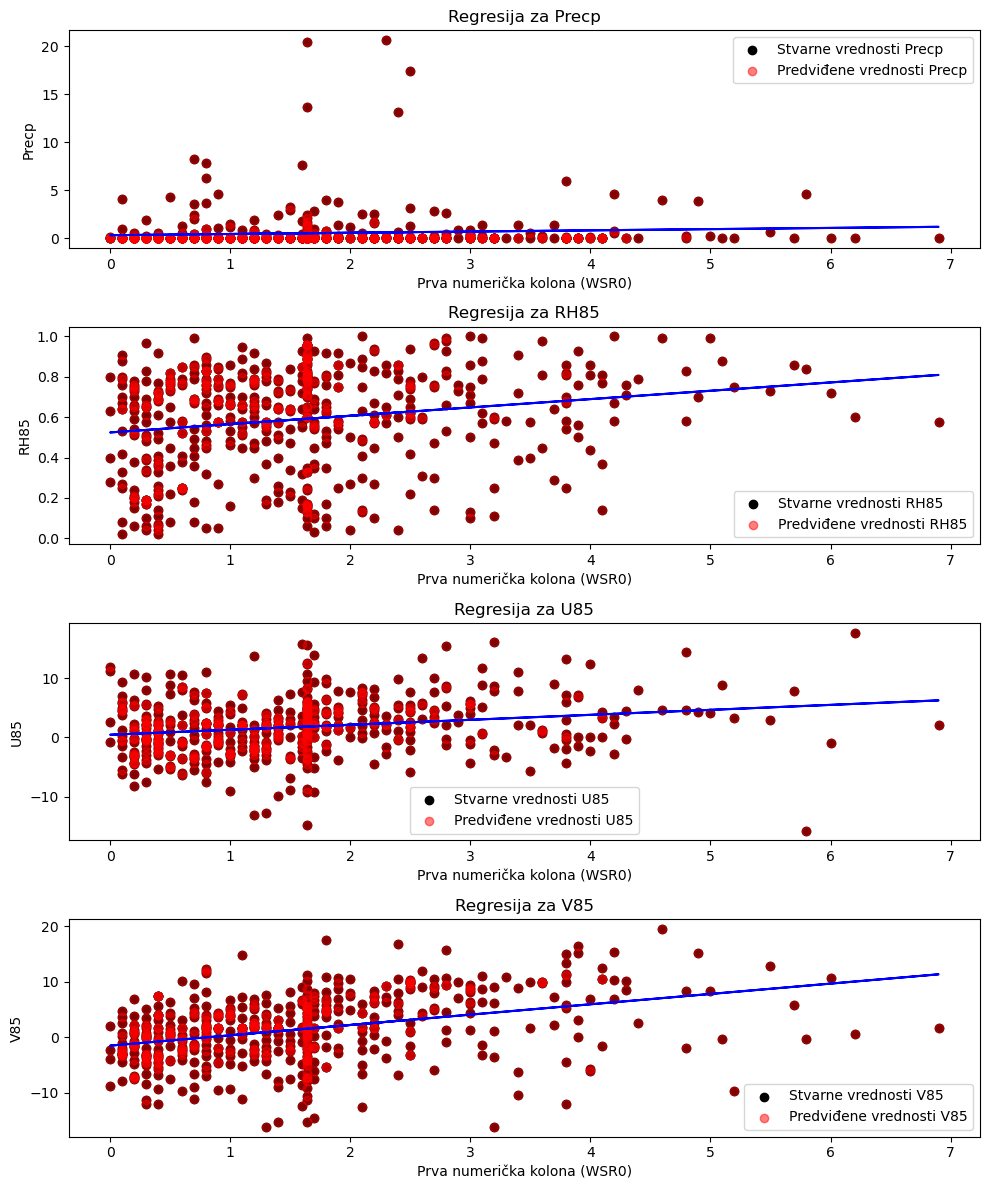

In [814]:
# Biramo sve numeričke kolone osim prve "Date"
X = df.iloc[:, 1:-1].values

# Biramo ciljni atribut ili više njih
y_columns = ['Precp', 'RH85', 'U85', 'V85'] 
y = df[y_columns].values

# Popunjavamo nedostajuće vrednosti u ciljnom atributu
imputer_y = SimpleImputer(strategy='mean')
y = imputer_y.fit_transform(y)

# Popunjavamo nedostajuće vrednosti u ulaznim atributima
imputer_X = SimpleImputer(strategy='mean')
X = imputer_X.fit_transform(X)

# Delimo podatake na trening i test skupove
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicijalizujemo model
model = LinearRegression()

# Metoda trenira model na trening podacima
# Prilagođavamo parametare modela kako bi se minimizovala greška između stvarnih i predviđenih vrednosti
model.fit(X_train, y_train)

# Predviđanja na test skupu
y_pred = model.predict(X_test)

# Evaluacija modela (predviđanje tačnosti)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Postavljamo subplotove (podešavanje grafika)
num_targets = len(y_columns)
fig, axes = plt.subplots(num_targets, 1, figsize=(10, 3 * num_targets))

for i, ax in enumerate(axes):
    y_column = y_columns[i]

    # Prikazujemo stvarne vrednosti
    ax.scatter(X_test[:, 0], y_test[:, i], color='black', label=f'Stvarne vrednosti {y_column}')

    # Prikazujemo predviđene vrednosti
    ax.scatter(X_test[:, 0], y_pred[:, i], color='red', label=f'Predviđene vrednosti {y_column}', alpha=0.5)

    # Dodajemo oznake i legende za svaki subplot
    ax.set_title(f'Regresija za {y_column}')
    ax.set_xlabel('Prva numerička kolona (WSR0)')
    ax.set_ylabel(y_column)
    ax.legend()

    # Dodajemo liniju regresije za srednje vrednosti
    regression_line = np.polyfit(X_test[:, 0], y_test[:, i], 1)
    ax.plot(X_test[:, 0], np.polyval(regression_line, X_test[:, 0]), color='blue', label='Linija regresije')

# Prikazujemo grafik
plt.tight_layout()
plt.show()


Ovde možemo uočiti mogući overfitting modela tj. jako dobro predviđene vrednosti.

# Višestruka regresija

Mean Squared Error: 7.435761215469383e-27
R-squared: 1.0


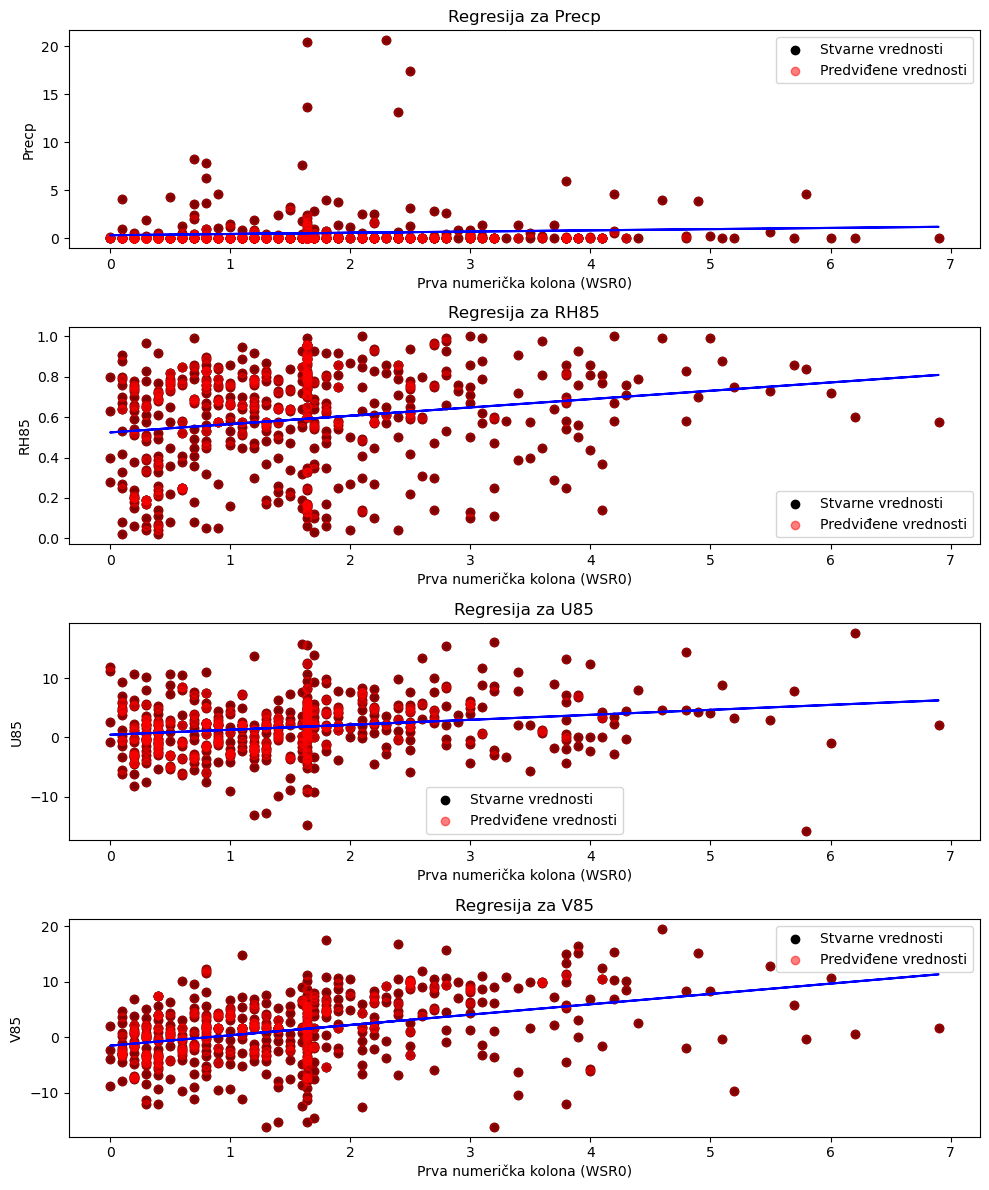

In [815]:
X = df.iloc[:, 1:-1].values

y_columns = ['Precp', 'RH85', 'U85', 'V85']  # Dodajte ostale ciljne kolone po potrebi
y = df[y_columns].values

imputer_y = SimpleImputer(strategy='mean')
y = imputer_y.fit_transform(y)

imputer_X = SimpleImputer(strategy='mean')
X = imputer_X.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

se = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


fig, axes = plt.subplots(num_targets, 1, figsize=(10, 3 * num_targets))

# Prikazujemo regresione linije za svaki ciljni atribut
for i in range(num_targets):
  
    axes[i].scatter(X_test[:, 0], y_test[:, i], color='black', label='Stvarne vrednosti ')
    
    axes[i].scatter(X_test[:, 0], y_pred[:, i], color='red', label='Predviđene vrednosti', alpha=0.5 )
    
    axes[i].set_title(f'Regresija za {y_columns[i]}')
    axes[i].set_xlabel('Prva numerička kolona (WSR0)')
    axes[i].set_ylabel(y_columns[i])
    axes[i].legend()

    
    regression_line = np.polyfit(X_test[:, 0], y_test[:, i], 1)
    axes[i].plot(X_test[:, 0], np.polyval(regression_line, X_test[:, 0]), color='blue', label='Linija regresije')


plt.tight_layout()
plt.show()


# Polinomska regresija

Mean Squared Error: 0.0008888553170718608
R-squared: 0.9999554989311081


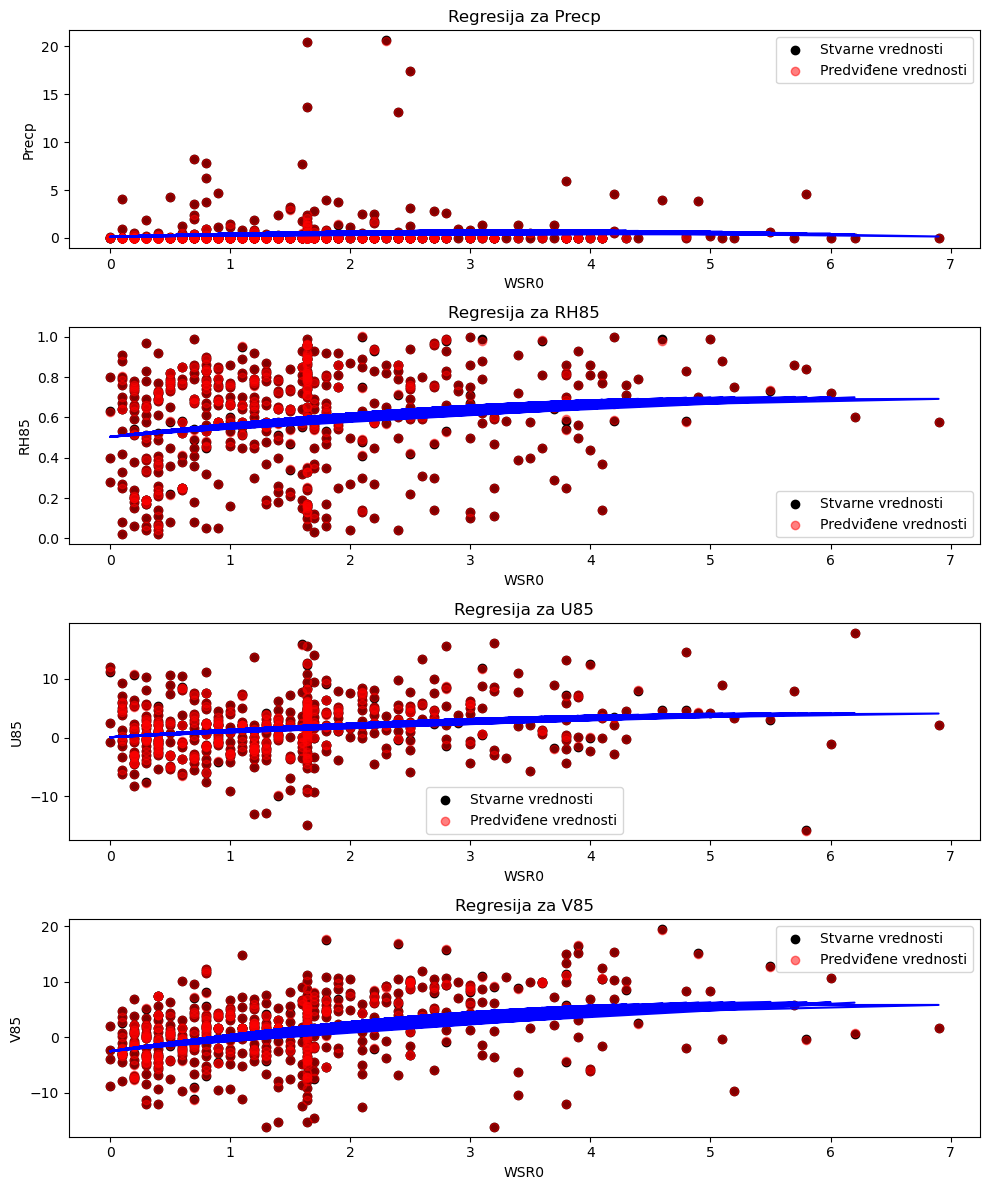

In [816]:
# Postavljamo broja stepena polinoma
degree = 2

X = df.iloc[:, 1:-1].values

y_columns = ['Precp', 'RH85', 'U85', 'V85']  
y = df[y_columns].values

imputer_y = SimpleImputer(strategy='mean')
y = imputer_y.fit_transform(y)

imputer_X = SimpleImputer(strategy='mean')
X = imputer_X.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

fig, axes = plt.subplots(num_targets, 1, figsize=(10, 3 * num_targets))

for i in range(num_targets):
   
    axes[i].scatter(X_test[:, 0], y_test[:, i], color='black', label='Stvarne vrednosti ')
    
    axes[i].scatter(X_test[:, 0], y_pred[:, i], color='red', label='Predviđene vrednosti',alpha=0.5)
    
    axes[i].set_title(f'Regresija za {y_columns[i]}')
    axes[i].set_xlabel('WSR0')
    axes[i].set_ylabel(y_columns[i])
    axes[i].legend()
    
    regression_line = np.polyfit(X_test[:, 0], y_test[:, i], 2)  # Koristimo polinom drugog stepena
    axes[i].plot(X_test[:, 0], np.polyval(regression_line, X_test[:, 0]), color='blue', label='Polinomska linija regresije')

plt.tight_layout()
plt.show()


# Estimacija uslovnih i bezuslovnih verovatnoća

In [817]:
# Izbacujemo kolone sa datumima
df = df.drop('Date', axis=1)

# Zamenjujemo NaN vrednosti nekom drugom vrednošću npr. 0
imputer = SimpleImputer(strategy='constant', fill_value=0)
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Analiza podataka
print(df_imputed["Target"].value_counts())  # Pregledajte distribuciju klasa

# Podela podataka
X = df_imputed.drop("Target", axis=1)  # Atributi
y = df_imputed["Target"]  # Target varijabla
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Estimacija bezuslovnih verovatnoća
class_probabilities = df_imputed["Target"].value_counts(normalize=True)

# Estimacija uslovnih verovatnoća
model = GaussianNB()  
model.fit(X_train, y_train)

# Testiramo model
accuracy = model.score(X_test, y_test)
print(f"Tačnost modela: {accuracy}")

# Prikaz uslovnog predviđanja
sample_data = X_test.iloc[0].values.reshape(1, -1)
predicted_proba = model.predict_proba(sample_data)
print(f"Uslovne verovatnoće za svaku klasu: {predicted_proba}")

Target
0.0    2374
1.0     160
Name: count, dtype: int64
Tačnost modela: 0.6923076923076923
Uslovne verovatnoće za svaku klasu: [[0.78441922 0.21558078]]


/Users/ksenija/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


Error koji se prikazuje je zanemarljiv.

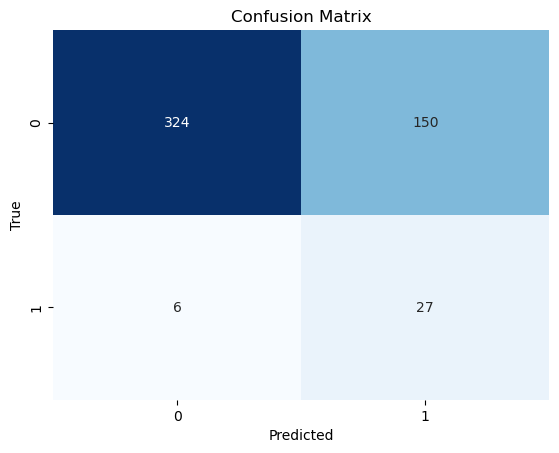

In [818]:
# Vizualizacija matrice konfuzije

y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


Prikazuje stvarne i predviđene vrednosti za svaku klasu. 

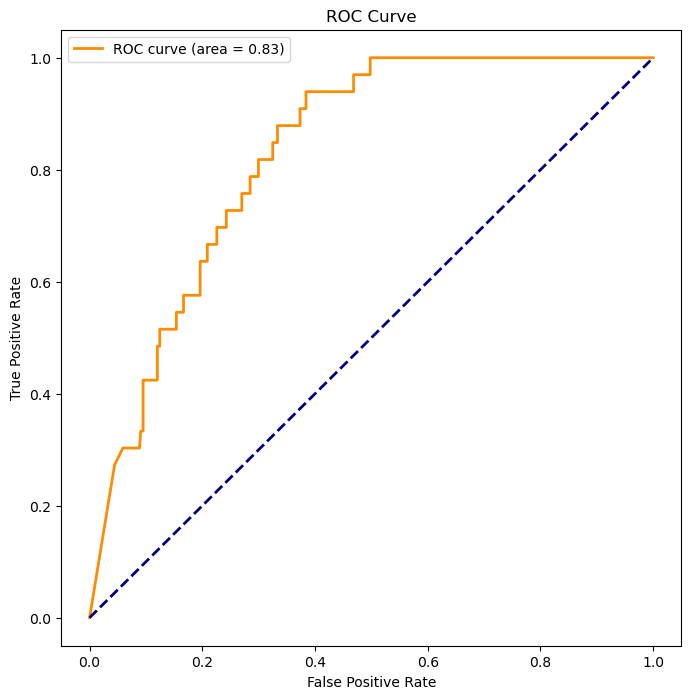

In [819]:
# Generisanje i prikazivanje ROC (Receiver Operating Characteristic) krive
# Izračunavanje AUC (Area Under the Curve) krive za evaluaciju performansi binarnog klasifikacionog modela

fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


Prikazuje odnos između stope lažno pozitivnih i stope istinito pozitivnih vrednosti.

# Testiranje parametarskih hipoteza

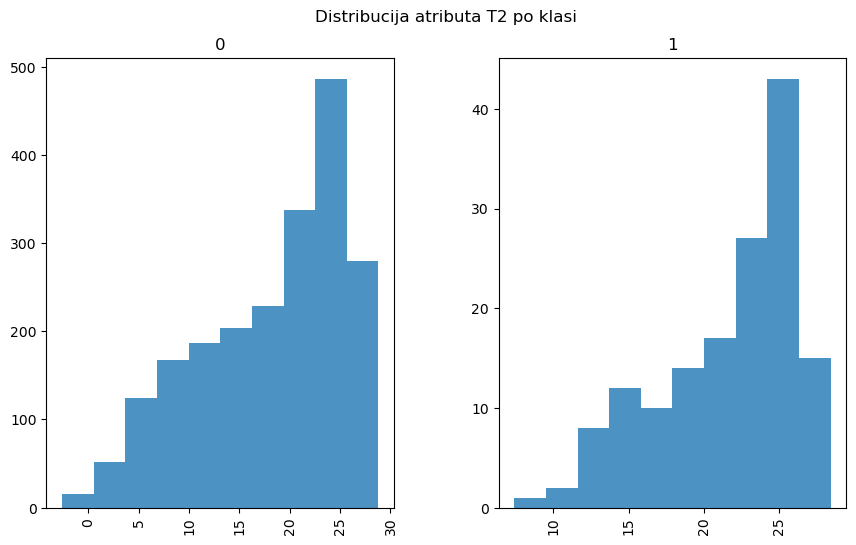

Studentov t-test - t-statistika: -8.378757270865757, P-vrednost: 8.899747162683374e-15


In [827]:
# Student t-test

# Proveravamo distribuciju podataka
df['T2'].hist(by=df['Target'], figsize=(10, 6), alpha=0.8)
plt.suptitle('Distribucija atributa T2 po klasi')
plt.show()

# Proveravamo homogenost varijansi
group0 = df[df['Target'] == 0]['T2']
group1 = df[df['Target'] == 1]['T2']
homogeneity_test_statistic, homogeneity_p_value = ttest_ind(group0, group1, equal_var=False)

print(f"Studentov t-test - t-statistika: {homogeneity_test_statistic}, P-vrednost: {homogeneity_p_value}")



In [828]:
#ANOVA

# Izbacujemo redove sa nedostajućim vrednostima u kolonama 
df = df.dropna(subset=['WSR0', 'WSR1', 'WSR2', 'T0', 'T1', 'Target'])

# Delimo podatke na dve grupe na osnovu vrednosti u "Target" koloni
group1 = df[df['Target'] == 0]
group2 = df[df['Target'] == 1]

# Izvršavamo ANOVA test za svaku kolonu zasebno
for column in df.columns[1:-1]:  # Preskačemo "Date" i "Target" kolone
    f_statistic, p_value = f_oneway(group1[column], group2[column])
    print(f"Za kolonu {column}:")
    print(f"Statistička vrednost ANOVA testa: {f_statistic}")
    print(f"P-vrednost: {p_value}")
    if p_value < 0.05:
        print("Razlike su statistički značajne.")
    else:
        print("Nema statistički značajnih razlika.")
    print("\n")


Za kolonu WSR1:
Statistička vrednost ANOVA testa: 72.83174538233
P-vrednost: 2.569488704101357e-17
Razlike su statistički značajne.


Za kolonu WSR2:
Statistička vrednost ANOVA testa: 76.94688576847284
P-vrednost: 3.4204191935995974e-18
Razlike su statistički značajne.


Za kolonu WSR3:
Statistička vrednost ANOVA testa: nan
P-vrednost: nan
Nema statistički značajnih razlika.


Za kolonu WSR4:
Statistička vrednost ANOVA testa: nan
P-vrednost: nan
Nema statistički značajnih razlika.


Za kolonu WSR5:
Statistička vrednost ANOVA testa: nan
P-vrednost: nan
Nema statistički značajnih razlika.


Za kolonu WSR6:
Statistička vrednost ANOVA testa: nan
P-vrednost: nan
Nema statistički značajnih razlika.


Za kolonu WSR7:
Statistička vrednost ANOVA testa: nan
P-vrednost: nan
Nema statistički značajnih razlika.


Za kolonu WSR8:
Statistička vrednost ANOVA testa: nan
P-vrednost: nan
Nema statistički značajnih razlika.


Za kolonu WSR9:
Statistička vrednost ANOVA testa: nan
P-vrednost: nan
Nema stati

Prikazali smo testiranje parametarskih hipoteza na dva načina, 'Student t-test' i 'AVAN'.

# Estimacija parametara združenih raspodela (kovarijansa i koeficijent korelacije)


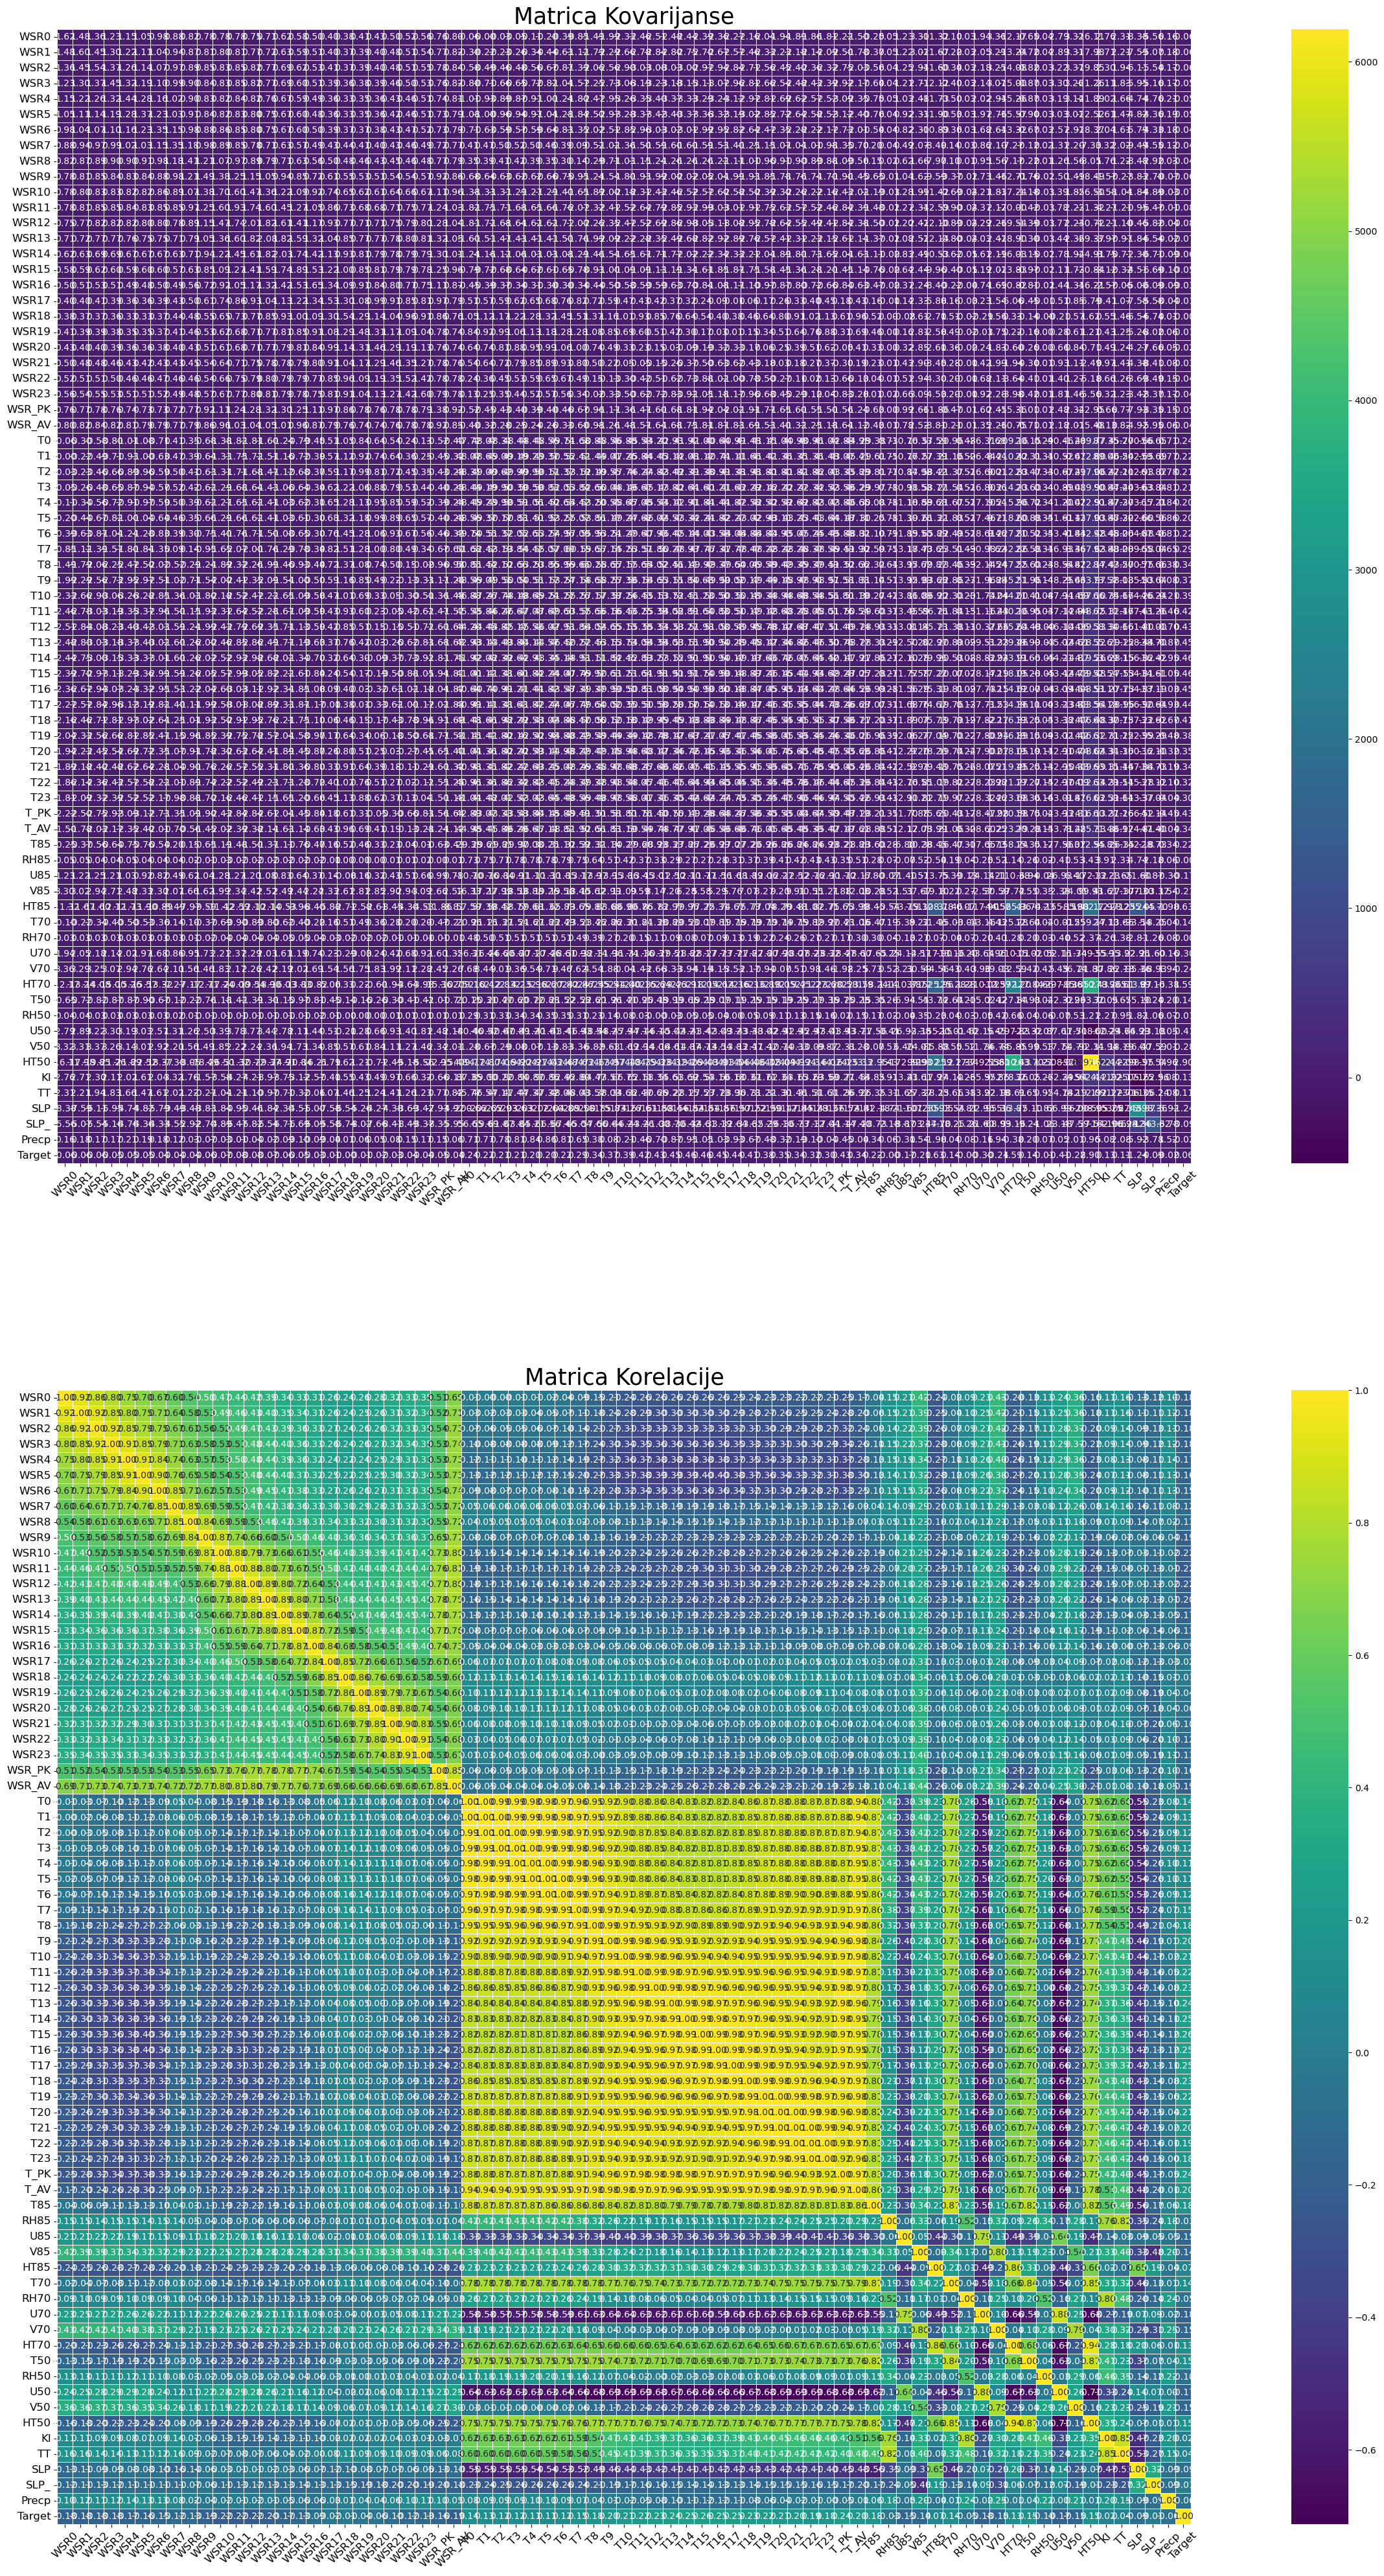

In [829]:
# Postavljamo veličinu figure
fig, axes = plt.subplots(nrows=2, figsize=(40, 50))

# Izračunavamo matricu kovarijanse
cov_matrix = df.cov()

# Prikazujemo toplinske mape za matricu kovarijanse
sns.heatmap(cov_matrix, annot=True, cmap='viridis', linewidths=.5, fmt='.2f', square=True, ax=axes[0])

# Podesavamo matricu kovarijanse
axes[0].set_title('Matrica Kovarijanse', fontsize=25)
axes[0].tick_params(axis='x', rotation=45)
axes[0].tick_params(axis='both', labelsize=12)

# Izračunavamo matricu korelacije
corr_matrix = df.corr()

# Prikazujemo toplinske mape za matricu korelacije
sns.heatmap(corr_matrix, annot=True, cmap='viridis', linewidths=.5, fmt='.2f', square=True, ax=axes[1])

# odesavamo matricu korelacije
axes[1].set_title('Matrica Korelacije', fontsize=25)
axes[1].tick_params(axis='x', rotation=45)
axes[1].tick_params(axis='both', labelsize=12)

# Čuvamo sliku sa prilagođenim dimenzijama i paletom boja
plt.savefig('prilagodjena_toplinska_mapa.png', bbox_inches='tight')

plt.show()


Prikazli smo grafičkim putem kovarijansu i koeficijent korelacije.

In [834]:

# Izračunavanje matrice kovarijanse
cov_matrix = df.cov()
print("Matrica kovarijanse:")
print(cov_matrix)

# Izračunavanje matrice korelacije
corr_matrix = df.corr()
print("\nMatrica korelacije:")
print(corr_matrix)



Matrica kovarijanse:
            WSR0      WSR1      WSR2      WSR3      WSR4      WSR5      WSR6  \
WSR0    1.619397  1.482327  1.356267  1.232618  1.150568  1.048227  0.982843   
WSR1    1.482327  1.601949  1.450431  1.299741  1.216994  1.107573  1.040927   
WSR2    1.356267  1.450431  1.535438  1.370379  1.257741  1.140464  1.073581   
WSR3    1.232618  1.299741  1.370379  1.452230  1.319017  1.194268  1.103670   
WSR4    1.150568  1.216994  1.257741  1.319017  1.436043  1.283994  1.162294   
...          ...       ...       ...       ...       ...       ...       ...   
TT      2.311170  2.213477  1.943254  1.832264  1.664003  1.467279  1.605158   
SLP    -8.384520 -7.589608 -6.109017 -5.949179 -4.742023 -4.817107 -5.793591   
SLP_   -5.559661 -5.073494 -5.544433 -5.164891 -4.763937 -4.364121 -4.327526   
Precp   0.163721  0.184107  0.169468  0.173622  0.208452  0.191857  0.179743   
Target -0.056635 -0.056266 -0.056570 -0.053184 -0.049468 -0.047054 -0.043975   

            WSR7  

Prikazali smo tekstualno.

# Estimacija intervala poverenja određenih parametara

In [831]:
# Biramo promenljivu
selected_variable = 'WSR0'  

# Izračunavamo interval poverenja za srednju vrednost
confidence_interval = sm.stats.DescrStatsW(df[selected_variable]).tconfint_mean()
print(f"Interval poverenja za srednju vrednost {selected_variable}: {confidence_interval}")


Interval poverenja za srednju vrednost WSR0: (1.5872951459474733, 1.693009923590434)


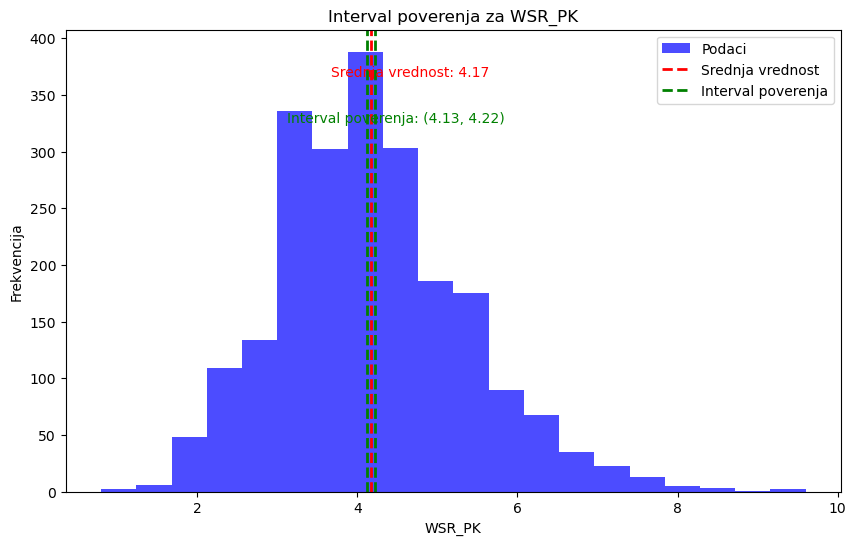

In [832]:
selected_variable = 'WSR_PK'  

# Izračunavamo interval poverenja za srednju vrednost
mean_confidence_interval = sm.stats.DescrStatsW(df[selected_variable]).tconfint_mean()

# Prikazujemo graf i tekstualni deo
plt.figure(figsize=(10, 6))

# Histogram podataka
plt.hist(df[selected_variable], bins=20, color='blue', alpha=0.7, label='Podaci')

# Vertikalna crta za srednju vrednost
plt.axvline(df[selected_variable].mean(), color='red', linestyle='dashed', linewidth=2, label='Srednja vrednost')

# Vertikalne crte za interval poverenja
plt.axvline(mean_confidence_interval[0], color='green', linestyle='dashed', linewidth=2, label='Interval poverenja')
plt.axvline(mean_confidence_interval[1], color='green', linestyle='dashed', linewidth=2)

# Dodajemo tekstualni deo sa vrednostima intervala
plt.text(df[selected_variable].mean() - 0.5, plt.ylim()[1] * 0.9, f'Srednja vrednost: {df[selected_variable].mean():.2f}', color='red')
plt.text(mean_confidence_interval[0] - 1, plt.ylim()[1] * 0.8, f'Interval poverenja: ({mean_confidence_interval[0]:.2f}, {mean_confidence_interval[1]:.2f})', color='green')

plt.title(f'Interval poverenja za {selected_variable}')
plt.xlabel(selected_variable)
plt.ylabel('Frekvencija')
plt.legend()
plt.show()
